<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 36** | Cientista de dados - Projeto Semantix
Aluno **Luís Fernando Castella Fitor Pimentel**<br> 


---

### Como machine learning pode evitar fraudes no cartão de crédito.

À medida que as compras online se tornam cada vez mais comuns e o uso de tecnologias digitais continua a crescer, especialmente durante a pandemia de coronavírus, houve um aumento substancial nas ocorrências de fraudes pela internet. Este fenômeno foi documentado em uma pesquisa conduzida pela Confederação Nacional de Dirigentes Lojistas (CNDL) e pelo Serviço de Proteção ao Crédito (SPC Brasil).

## Como o uso de machine learning pode ser importante para evitar fraudes?

Cada vez mais os Banco e Administradoras de cartões de crédito buscam soluções para minimizar prejuízos causados por estelionatários. Este projeto tem como objetivo desenvolver um modelo de machine learning capaz de prever se uma transação com cartão de crédito é fraudulenta ou legítima. Para isso, iniciaremos com uma análise detalhada dos dados, seguida pelo tratamento e aplicação de três modelos distintos, cada um com ajustes específicos. Cada etapa deste trabalho será documentada cuidadosamente, visando transparência e replicabilidade.

##### Importação Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [4]:
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifier

In [5]:
import tensorflow as tf

In [6]:
from pickle import dump
from pickle import load

In [8]:
df = pd.read_csv('creditcard.csv')

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Por razões de confidencialidade, não foram disponibilizadas mais informações sobre o conjunto de dados. As únicas características que não foram alteradas pelo PCA são 'Time' e 'Amount'.

A característica 'Time' indica o intervalo de tempo, em segundos, entre cada transação e a primeira transação registrada no conjunto de dados. Já 'Amount' representa o valor da transação. A variável 'Class' é a variável de resposta, assumindo o valor 1 em caso de fraude e 0 em caso contrário.

##### Limpeza e tratamento dos dados

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Não há, portanto, valores nulos ou faltantes no conjunto de dados. Seguimos agora com uma verificação sobre a variável objetivo.

In [11]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

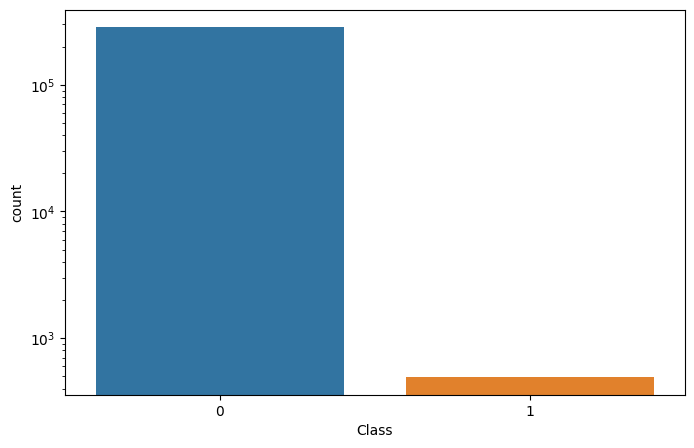

In [12]:
plt.figure(figsize=(8,5))
_= sns.countplot(x='Class', data = df, log=True)

Verifica-se um enorme desbalanceamento na variável Class. Para melhor performance do algorítmo de machine learning usaremos técnicas para balanceamento dos dados.

##### Balanceamento de dados

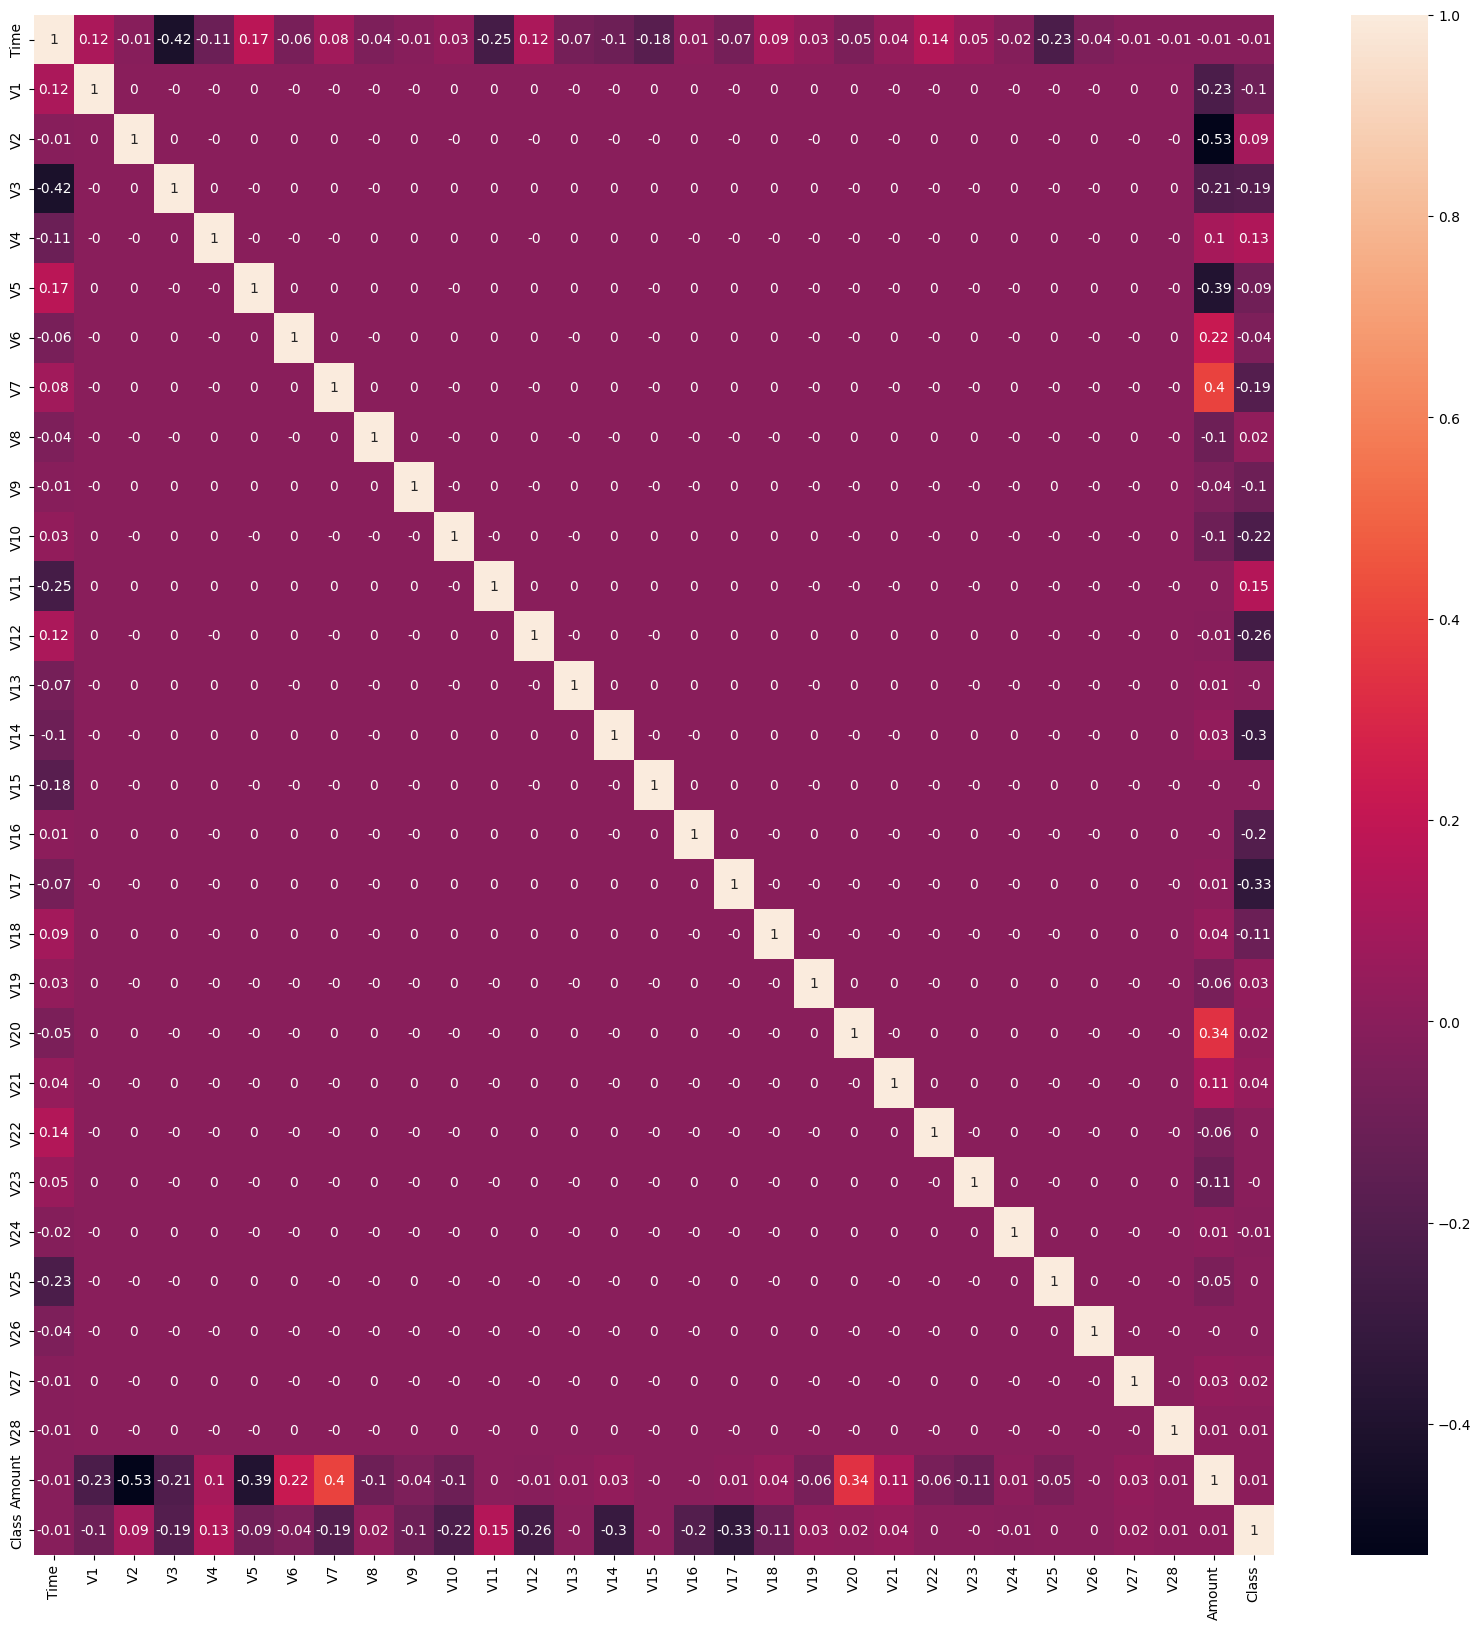

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(round(df.corr(),2), annot=True);

Devido ao processo de PCA pelo qual o conjunto de dados passou, é razoável supor que não haja uma correlação forte entre as variáveis independentes. Vamos agora avaliar a correlação delas com a variável alvo.

In [14]:
df.corr()[['Class']].sort_values(by='Class')[:-1]

,Class
V17,-0.326481
V14,-0.302544
V12,-0.260593
V10,-0.216883
V16,-0.196539
V3,-0.192961
V7,-0.187257
V18,-0.111485
V1,-0.101347
V9,-0.097733


#### Processamento do dataset para uso em Machine Learning

In [15]:
Y = df['Class']
X = df.loc[:, df.columns!='Class']
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

####  Separação de dataset em treino e teste
Para facilitar o aprendizado dos algoritmos e validar nosso modelo posteriormente, vamos dividir o conjunto de dados em conjuntos de treinamento e teste. 

Em seguida, o conjunto de treinamento será subdividido usando a técnica de validação cruzada.

In [16]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', Y_train.shape)
print('Y_test', X_test.shape)

X_train (227845, 30)
X_test (56962, 30)
Y_train (227845,)
Y_test (56962, 30)


In [17]:
df = pd.concat([X_train, Y_train], axis=1)

In [18]:
df.Class.value_counts()

Class
0    227453
1       392
Name: count, dtype: int64

##### Undersampling

In [19]:
fraud_df = df.loc[df['Class']==1]
print('fraud_shape:',fraud_df.shape)
non_fraud_df = df.loc[df['Class']==0][:392]
print('non_fraud_shape:',non_fraud_df.shape)

fraud_shape: (392, 31)
non_fraud_shape: (392, 31)


In [20]:
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
balanced_df = normal_distributed_df.sample(frac=1, random_state=42)

In [21]:
Y_train_new = balanced_df['Class']
X_train_new = balanced_df.loc[:, balanced_df.columns!='Class']

In [22]:
print('X_train_new:', X_train_new.shape)
print('Y_train_new:', Y_train_new.shape)

X_train_new: (784, 30)
Y_train_new: (784,)


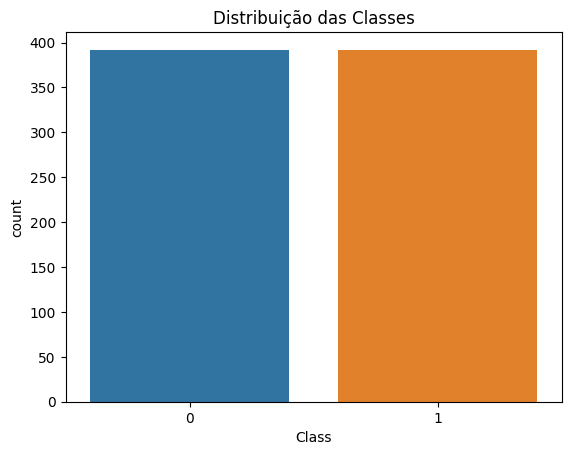

In [27]:
sns.countplot(x='Class', data=balanced_df)
plt.title('Distribuição das Classes')
plt.show()

### Modelo

- Utilizaremos alguns algorítimos

In [28]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))

In [29]:
num_folds = 10
seeds = 7
scoring = 'accuracy'

In [30]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seeds)
    cv_results = cross_val_score(model, X_train_new, Y_train_new, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    cpm = (name, cv_results.mean(), cv_results.std())
    print(cpm)

C:\Users\Outro\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Outro\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

('LR', 0.9261441090555014, 0.039100943408197746)


C:\Users\Outro\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Outro\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
  File "C:\Users\Outro\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\Outro\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\Outro\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_response.py", line 210, in _get_response_values
    y_pred = prediction_method(X)
  File "C:\Users\Outro\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py", line 2

('KNN', nan, nan)
('RF', 0.9350373255436546, 0.034225054234574094)


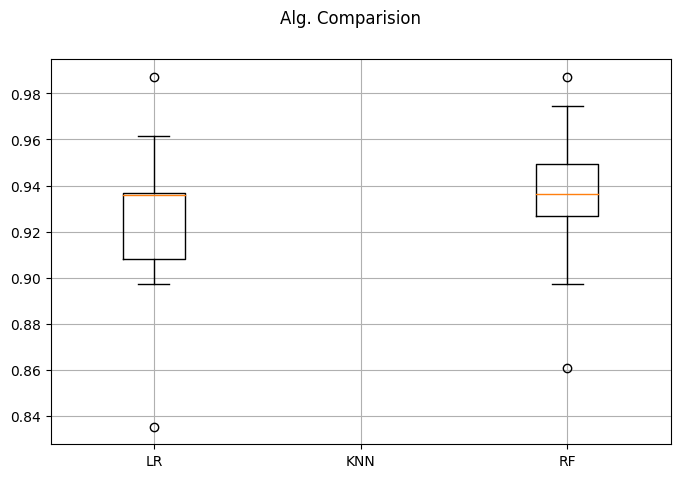

In [31]:
fig = plt.figure(figsize=(8,5))
fig.suptitle('Alg. Comparision')
ax = fig.add_subplot()

plt.boxplot(results)
ax.set_xticklabels(names)

plt.grid()
plt.show()

In [32]:
n_estimators = [20,180,1000]
max_depth= [2,3,5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seeds)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_new, Y_train_new)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']

for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.933772 using {'max_depth': 3, 'n_estimators': 1000}
#5 0.926177 (0.037424) with: {'max_depth': 2, 'n_estimators': 20}
#2 0.931272 (0.038452) with: {'max_depth': 2, 'n_estimators': 180}
#6 0.924911 (0.036760) with: {'max_depth': 2, 'n_estimators': 1000}
#7 0.923645 (0.046662) with: {'max_depth': 3, 'n_estimators': 20}
#3 0.929925 (0.032177) with: {'max_depth': 3, 'n_estimators': 180}
#1 0.933772 (0.040018) with: {'max_depth': 3, 'n_estimators': 1000}
#9 0.910808 (0.030477) with: {'max_depth': 5, 'n_estimators': 20}
#8 0.922282 (0.033279) with: {'max_depth': 5, 'n_estimators': 180}
#4 0.927377 (0.038916) with: {'max_depth': 5, 'n_estimators': 1000}


In [33]:
params_max_depth = grid_result.best_params_['max_depth']
params_n_estimators = grid_result.best_params_['n_estimators']

In [34]:
model = GradientBoostingClassifier(max_depth=params_max_depth, n_estimators=params_n_estimators)
model.fit(X_train_new, Y_train_new)

GradientBoostingClassifier(n_estimators=1000)

In [35]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9620799831466592
[[54708  2154]
 [    6    94]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56862
           1       0.04      0.94      0.08       100

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [36]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [37]:
col_target = 'Class'
target = df[col_target]
target

44828     0
221877    0
278826    0
149792    0
226041    0
         ..
235075    0
10742     0
49689     0
189636    0
61615     0
Name: Class, Length: 227845, dtype: int64

In [38]:
data_train, data_test, target_train, target_test = train_test_split(data_scaled, target, test_size = 0.2, random_state = 7)

In [39]:
ros = RandomOverSampler(random_state=0)
data_over, target_over = ros.fit_resample(data_train, target_train)
print('Tamanho do dataset balanceado:\n%s' % (target_over.value_counts()))

Tamanho do dataset balanceado:
Class
0    181967
1    181967
Name: count, dtype: int64


###  Escolha do modelo
Para dar continuidade ao nosso trabalho, optei pelo modelo Random Forest. Seu desempenho foi comparável ao do KNN, com a vantagem de consumir recursos computacionais apenas durante o treinamento do modelo. Embora o KNN tenha apresentado um desempenho ligeiramente superior, ele requer recursos computacionais durante a classificação, pois armazena todo o conjunto de dados e classifica novas entradas quando solicitado, o que pode dificultar sua implementação em ambientes de produção.

In [40]:
rf = RandomForestClassifier()

model = rf.fit(data_over, target_over)

In [41]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [42]:
pred_rf = model.predict(data_train)

print('Classification Report: \n', classification_report(target_train, pred_rf))
print("-" * 100)
print()
print('Accuracy Score: ', accuracy_score(target_train, pred_rf))
print("-" * 100)
print()


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    181967
           1       1.00      1.00      1.00       309

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

----------------------------------------------------------------------------------------------------

Accuracy Score:  1.0
----------------------------------------------------------------------------------------------------



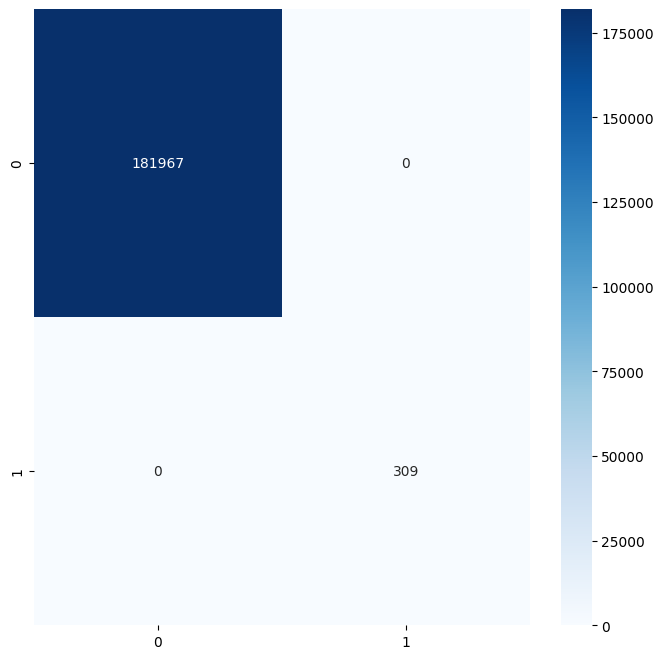

In [43]:
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(target_train, pred_rf), annot=True, fmt='g', cmap = 'Blues');

Parece que ocorreu overfitting, o que significa que o modelo se ajustou muito bem aos dados de treinamento e provavelmente terá um desempenho significativamente pior com os dados de teste. O resultado indica uma precisão de 100%.

Vamos verificar o resultado agora.

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45486
           1       1.00      1.00      1.00        83

    accuracy                           1.00     45569
   macro avg       1.00      1.00      1.00     45569
weighted avg       1.00      1.00      1.00     45569

----------------------------------------------------------------------------------------------------

Accuracy Score:  1.0
----------------------------------------------------------------------------------------------------



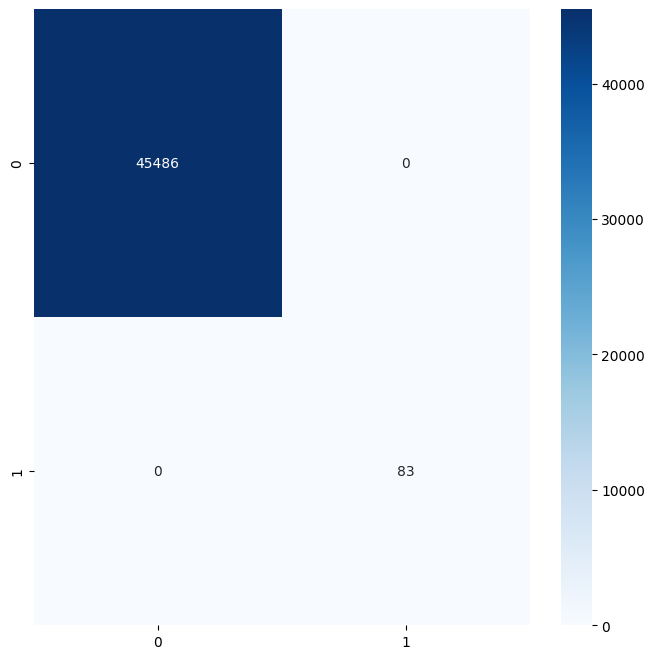

In [44]:
pred_rf = model.predict(data_test)


print('Classification Report: \n', classification_report(target_test, pred_rf))
print("-" * 100)
print()
print('Accuracy Score: ', accuracy_score(target_test, pred_rf))
print("-" * 100)
print()


plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(target_test, pred_rf), annot=True, fmt='g', cmap = 'Blues');

Neste momento, é crucial considerar um aspecto importante. Das 45.486 transações legítimas, nenhuma das 100 transações fraudulentas foi erroneamente classificada como legítima. Cabe à administradora de cartões de crédito decidir qual é o ponto ideal entre correr o risco de aprovar uma transação fraudulenta e negar uma transação legítima, pois isso implica diversos riscos, como perdas financeiras significativas, danos à reputação junto aos clientes, entre outros.

##  Conclusão¶
O uso de Machine Learning para a prevenção de fraudes com cartões de crédito apresenta diversas vantagens para as administradoras. Nosso modelo alcançou um f1-score médio de 100%. Como discutido ao longo do trabalho, encontrar o equilíbrio entre bloquear transações fraudulentas e permitir transações legítimas é desafiador e envolve considerações como risco/retorno, imagem da empresa e satisfação do cliente.

Neste projeto, procurei destacar algumas técnicas que podem ser empregadas, e o desempenho obtido foi satisfatório.